# Predicting Length of Hospital Stays

HealthMan a non-profit focused on the management and functioning of Hospitals has a Data Science project they have posted on Kaggle. Hospitals have to constantly shuffle people and resources to meet every patient’s needs. With the recent pandemic, many people died simply because hospitals didn’t have enough resources. If the hospital knows how long a patient will need care they can plan their use of resources to save stress for patients and staff while allowing them to optimize the care and treatments given. Our goal in this project is to create a model that will classify the length of stay for patients from the intake data into one of 11 ranges.

In this notebook we will complete the Data wrangling, and EDA through the following steps:

#### Data Wrangling
* Import Data
* Inspect Dataset
* Missing Values
* Check Duplicates

#### EDA
* Build Plot Functions
* Explore Questions & Create Visuals
* Consider Features to Engineer


## Data Wrangling
### Import Data

In [1]:
# Importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Importing data
stay_df = pd.read_csv('data/train_data.csv')
stay_test_df = pd.read_csv('data/test_data.csv')

### Inspect Dataset

In [3]:
stay_df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
# check classification ranges for length of stay
stay_df.Stay.unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [5]:
stay_df.shape, stay_test_df.shape


((318438, 18), (137057, 17))

We're starting with 16 features we can pass a model, and 318438 samples to create and evaluate our model. The final test set predictions can be submitted to the hackathon for final accuracy score.

In [6]:
stay_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [7]:
stay_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137022 non-null  float64
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1349

In [15]:
# There are very few quantitative features 
stay_df.describe()[['Available Extra Rooms in Hospital', 'Visitors with Patient', 'Admission_Deposit']]

,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000
mean,3.197627,3.284099,4880.749392
std,1.168171,1.764061,1086.776254
min,0.000000,0.000000,1800.000000
25%,2.000000,2.000000,4186.000000
50%,3.000000,3.000000,4741.000000
75%,4.000000,4.000000,5409.000000
max,24.000000,32.000000,11008.000000


Some column names have spaces and others have underscores. Capitalization is also inconsistent.
### Missing Values

In [16]:
stay_df.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [17]:
stay_test_df.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

Looks like only two columns have missing values to impute.
Bed Grade can be filled with the mode of the train set.
For City_Code_Patient we will make the assumption that the patient lives in the city the hospital is in and fill with City_Code_Hospital.

The inconsistency of column names doesn't affect the data but will be easier to work with if we clean up the spaces.

In [18]:
# clean up column names first by replacing spaces with underscore
[stay_df.rename(columns={name: name.replace(" ", "_")}, inplace= True) for name in stay_df.columns if ' ' in name]
[stay_test_df.rename(columns={name: name.replace(" ", "_")}, inplace = True) for name in stay_test_df.columns if ' ' in name]
stay_df.columns, stay_test_df.columns

(Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
        'Hospital_region_code', 'Available_Extra_Rooms_in_Hospital',
        'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed_Grade',
        'patientid', 'City_Code_Patient', 'Type_of_Admission',
        'Severity_of_Illness', 'Visitors_with_Patient', 'Age',
        'Admission_Deposit', 'Stay'],
       dtype='object'),
 Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
        'Hospital_region_code', 'Available_Extra_Rooms_in_Hospital',
        'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed_Grade',
        'patientid', 'City_Code_Patient', 'Type_of_Admission',
        'Severity_of_Illness', 'Visitors_with_Patient', 'Age',
        'Admission_Deposit'],
       dtype='object'))

In [19]:
# fill missing Bed_Grade

stay_df.Bed_Grade.fillna(stay_df.Bed_Grade.mode()[0], inplace=True)

stay_test_df.Bed_Grade.fillna(stay_df.Bed_Grade.mode()[0], inplace=True)

stay_df.Bed_Grade = stay_df.Bed_Grade.astype('int')
stay_test_df.Bed_Grade = stay_test_df.Bed_Grade.astype('int')

In [20]:
# fill missing City_Code_Patient with the City_Code_Hospital of the sample


stay_df.loc[stay_df.City_Code_Patient.isnull(), 'City_Code_Patient'] = stay_df.City_Code_Hospital.loc[stay_df.City_Code_Patient.isnull()]

stay_test_df.loc[stay_test_df.City_Code_Patient.isnull(), 'City_Code_Patient'] = stay_test_df.City_Code_Hospital.loc[stay_test_df.City_Code_Patient.isnull()]

stay_df.City_Code_Patient = stay_df.City_Code_Patient.astype('int')
stay_test_df.City_Code_Patient = stay_test_df.City_Code_Patient.astype('int')

### Check Duplicates

In [21]:

stay_df[stay_df.duplicated()]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay


In [22]:
#just to be sure every sample has a unique case_id
stay_df.case_id.nunique() == len(stay_df)

True

## EAD

Since a number of categorical features are represented with integers lets be sure we understand what we're trying to plot for each feature.

In [23]:
# column name, number of unique values, data type
_ =[print(col, stay_df[col].nunique(), stay_df[col].dtype) for col in stay_df.columns]

case_id 318438 int64
Hospital_code 32 int64
Hospital_type_code 7 object
City_Code_Hospital 11 int64
Hospital_region_code 3 object
Available_Extra_Rooms_in_Hospital 18 int64
Department 5 object
Ward_Type 6 object
Ward_Facility_Code 6 object
Bed_Grade 4 int64
patientid 92017 int64
City_Code_Patient 37 int64
Type_of_Admission 3 object
Severity_of_Illness 3 object
Visitors_with_Patient 28 int64
Age 10 object
Admission_Deposit 7300 float64
Stay 11 object


### Build Plot Functions

In [24]:
def countplot(x, hue=None, order=None, hue_order=None):
    """"plots catagorical features as boxplot and swarm plot"""
    fig = plt.figure(figsize=(10,6))
    ax = sns.countplot(x= x, data=stay_df,hue= hue, order=order, hue_order= hue_order, palette='icefire_r')
    

def boxplot(x, y, hue=None):
    fig = plt.figure(figsize=(10,6))
    sns.boxplot(x= x, y=  y, data=stay_df, palette='icefire_r')



### Explore Questions & Create Visuals

We have 32 hospitals from 3 different regions with a number of descriptive features for the hospitals and a couple for the patients admission assessment.

* Can we find any similar patterns between hospital descriptors such as Hospital_type_code, Ward_Type or Department?
* Can we tell if particular hospitals specialize in particular care?
* Are patients with a history of visits returning for the same issues or new events?
* Do patients with more visitors have longer or shorter stays?




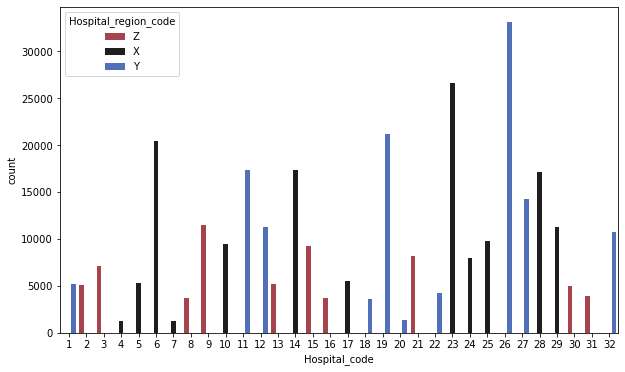

In [25]:
countplot(x= 'Hospital_code', hue='Hospital_region_code')
# number of samples for each hospital colors by reagion hospital is in

10 hospitals are in region Z

12 hospitals are in region X

10 hospitals are in region Y

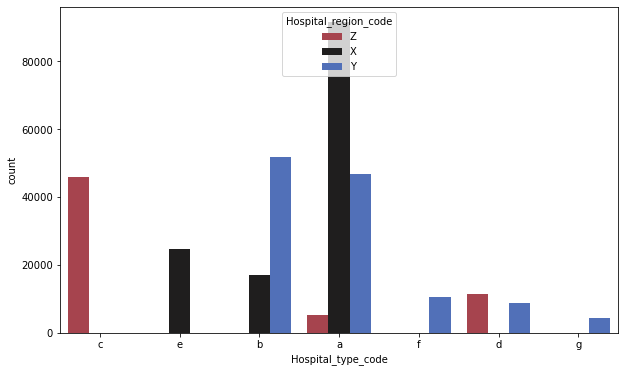

In [26]:
countplot(x= 'Hospital_type_code', hue='Hospital_region_code')
# number of samples for each type of hospitals by region

Only type code 'a' is in all 3 regions. Type g has the fewest hospitals and is only in region 'Y'. Types 'c' and 'e' are also only found in one region. This may mean patients have to travel to these hospitals for specialized care. 

We have Hospital type code and Ward code, can we tell anything about what types mean or go together? Does a particular type tend to keep patients longer?

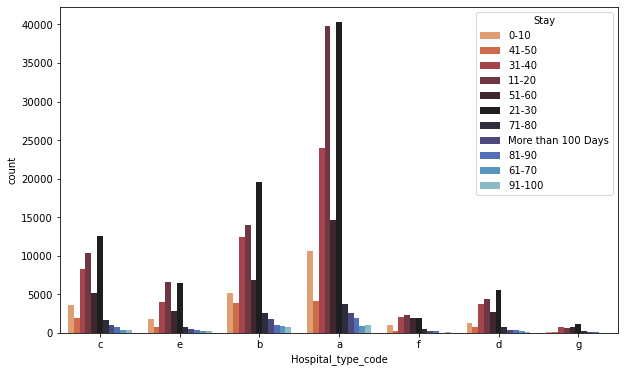

In [27]:
countplot(x= 'Hospital_type_code', hue='Stay')
# number patiens for length of stay by type code

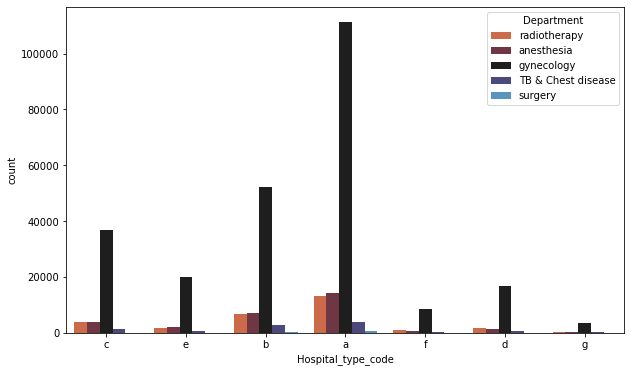

In [28]:
countplot(x= 'Hospital_type_code', hue='Department')
# number of hospitals of each code by departments

Even though the type code suggests different kinds of hospitals for the most part they seem to all have all the departments except for maybe surgery.
The most visits are to the gynecology department.

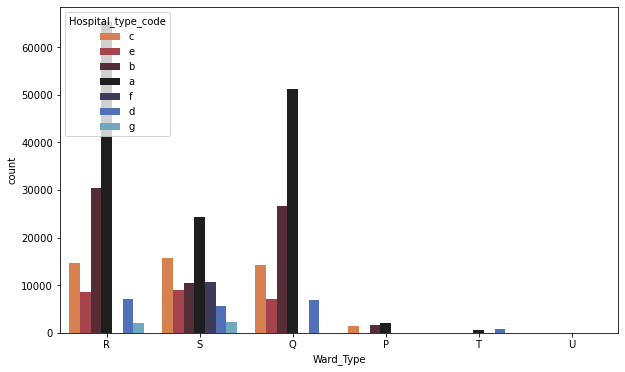

In [29]:
countplot(x= 'Ward_Type', hue='Hospital_type_code')
# number of visits to each ward type by type code

Ward type 'P', 'T', and 'U' have few visitors compared to 'R', 'S', and 'Q'. Not finding much relation ship between type code and ward type

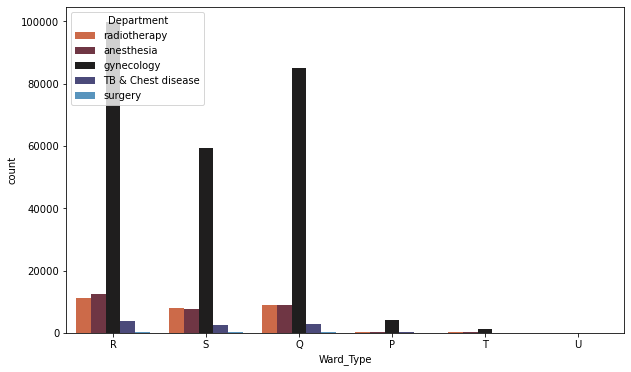

In [30]:
countplot(x= 'Ward_Type', hue='Department')
# number of visits to each ward type by department

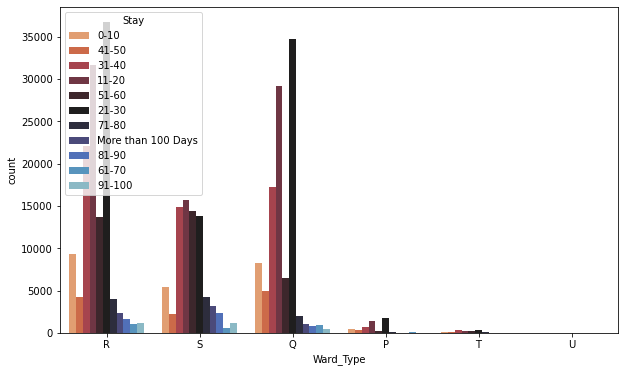

In [31]:
countplot(x= 'Ward_Type', hue='Stay')
# number of visits to each ward type by length of stay

Ward type 'R', 'S', and 'Q' seem to hold pretty similar distributions in relation to other feature. No clear idea what they stand for.

Do some hospitals or regions tend to have more rooms available?

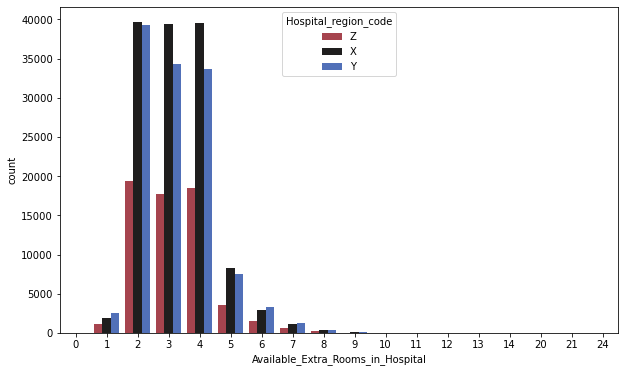

In [32]:
countplot('Available_Extra_Rooms_in_Hospital', hue= 'Hospital_region_code')
# frequentsy of number of rooms availible by region

Since region X has 2 more hospitals then 'Z' or 'Y' it makes since they have more visitors. Region 'Z' has just as many hospitals as 'Y' but they must be smaller hospitals. They have less visitors but don't have more beds available. 

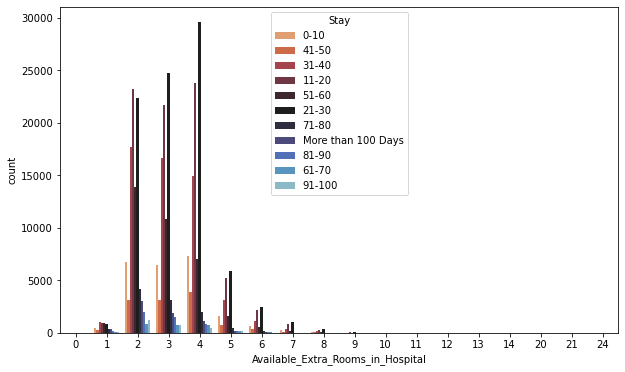

In [34]:
countplot('Available_Extra_Rooms_in_Hospital', hue= 'Stay')
# frequentsy of number of rooms availible by length of stay

Text(0.5, 1.0, 'Top 40 patients with the Most visits')

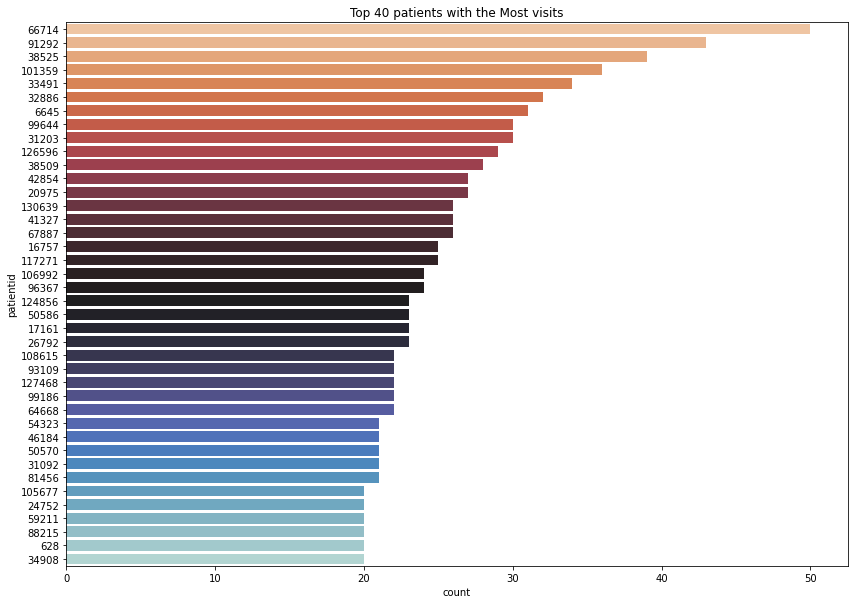

In [35]:
fig = plt.figure(figsize=(14,10))
ax = sns.countplot(y='patientid', data=stay_df, order= stay_df.patientid.value_counts().iloc[:40].index, palette='icefire_r')
plt.title('Top 40 patients with the Most visits')
# top 40 visitors - most number of times patient is admitted

We know every visit is a unique sample but we have no dates to know how many years are collected here. 20-50 visits to the hospital could be a couple really sick years or a whole life time of patient records here. 

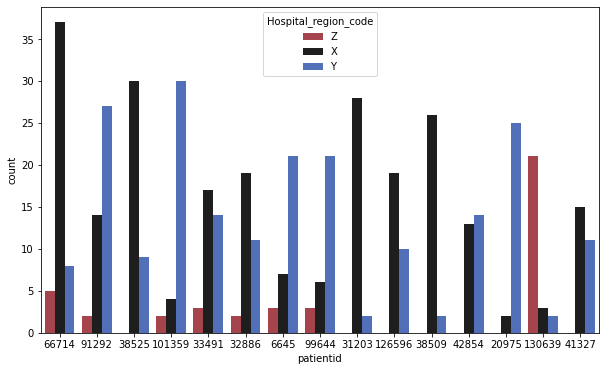

In [36]:
patents_visits = stay_df.patientid.value_counts().iloc[:15].index
countplot('patientid', hue= 'Hospital_region_code', order= patents_visits)
# the 15 patiens with the most hospital visits counted by number of visits in each reagion

Patients with lots of do seem to have been to hospitals from multiple regions. Perhaps this indicates travel to see a specialist or having moved to another region.

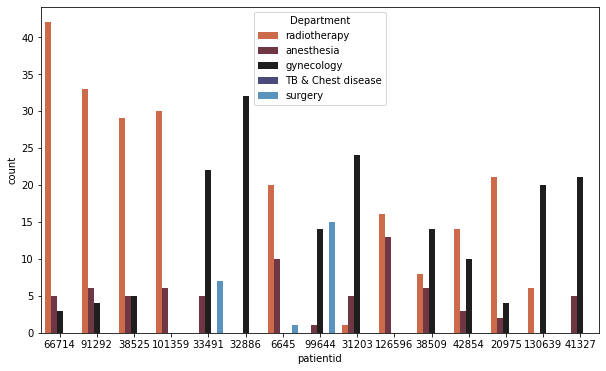

In [37]:

countplot('patientid', hue= 'Department', order= patents_visits)
# the 15 patiens with the most hospital visits counted by number of admitance to each depatments

Radiotherapy visits would support that the patient is very sick and needs to see a specialist.

We saw earlier that surgery was the least frequent department to be admitted to so it's interesting to see it is more likely for those who have also been admitted for gynecology.

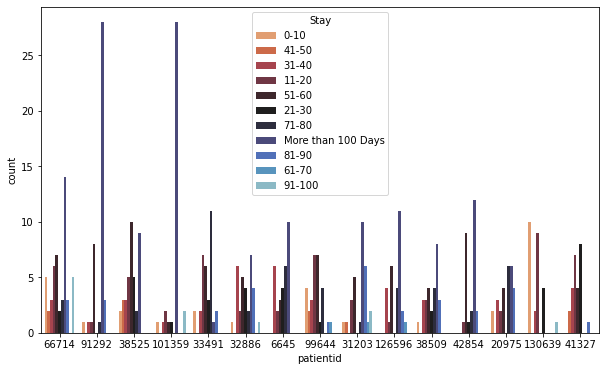

In [38]:
countplot('patientid', hue= 'Stay', order= patents_visits)
# the 15 patiens with the most hospital visits counted by length of stays

two patients have almost 30 stays in the hospital that are more the 100 days long. Assuming none of these can overlap we are looking at least 8 years of records. It could be 50 years worth for all we know.

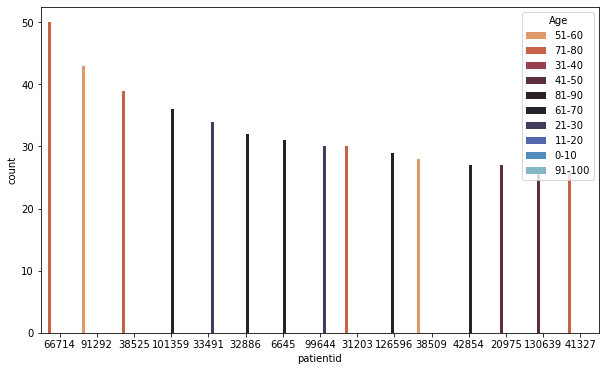

In [41]:
countplot('patientid', hue= 'Age', order= patents_visits)
# count of pateint visits by age recorded

We only have one age range for each patient. This could indicate the system is updating age to the patients current age range or that we're looking at 10 years of records. It's hard to read this dataset because it has been manipulated so much to provide privacy. 

What can we learn from the bed grade?

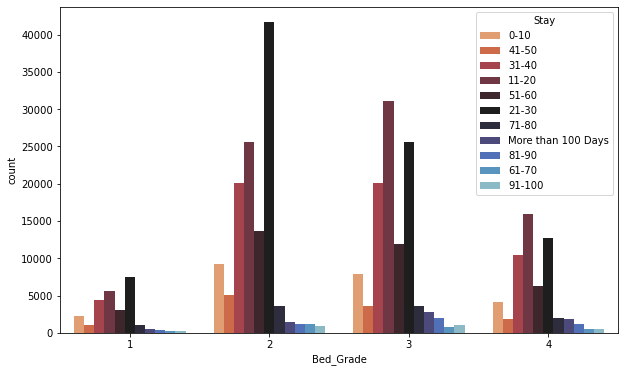

In [42]:
countplot('Bed_Grade', hue= 'Stay')
# bed grade by length of stay

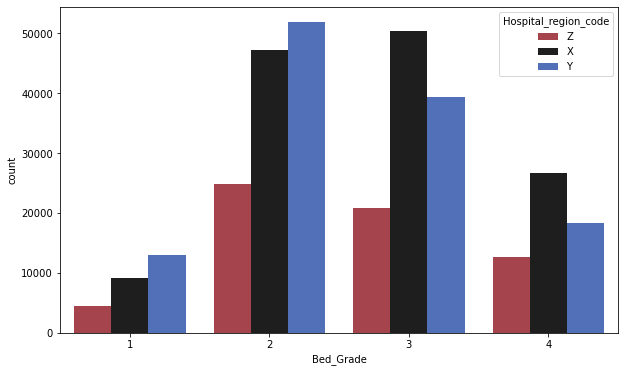

In [43]:
countplot('Bed_Grade', hue= 'Hospital_region_code')
# bed grade by region

Each bed grade seems to have a similar dispersal in length of stay. (No getting better faster because the bed quality)  
Region 'Y' does seem to have more grade '1' and '2' beds.

Are there patterns in admissions type or severity of illness?

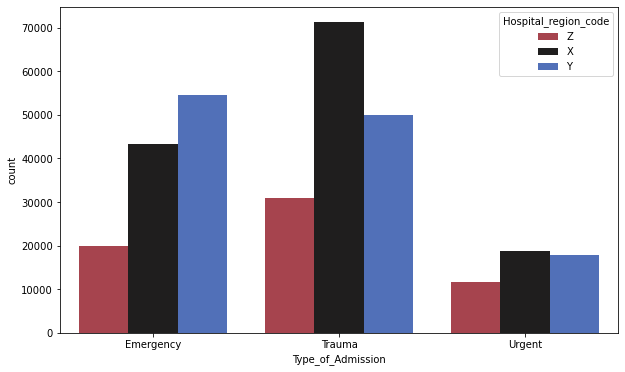

In [45]:
countplot('Type_of_Admission', hue='Hospital_region_code')
# number of admission type by reagion

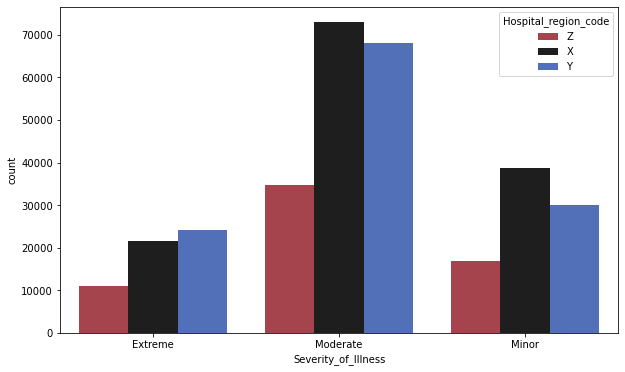

In [51]:
countplot('Severity_of_Illness', hue='Hospital_region_code')

Earlier we surmised that region X has more hospitals. Yet here we find that region Y has a larger portion of the emergency visits than the other regions and it makes up the majority of their visits.



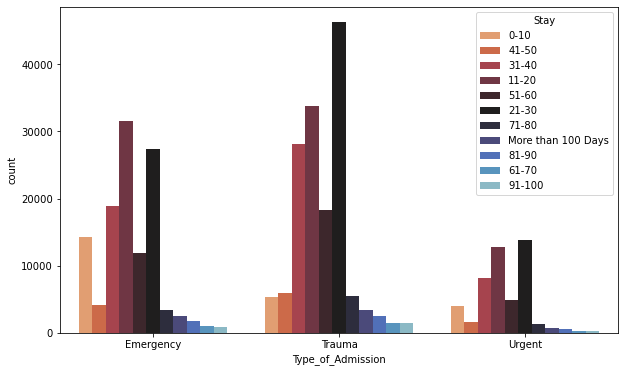

In [46]:
countplot('Type_of_Admission', hue='Stay')
# count of admissions type by stay length

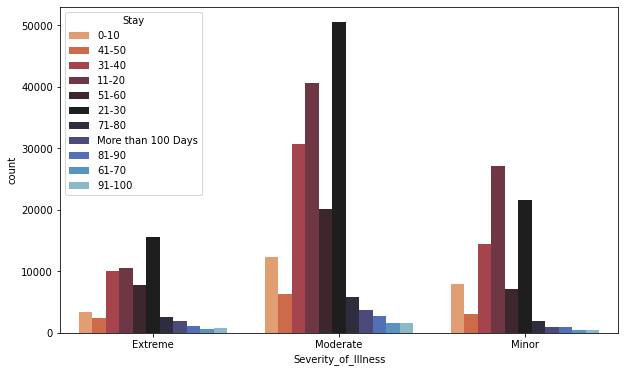

In [50]:
countplot('Severity_of_Illness', hue='Stay')
# severity of illness by stay

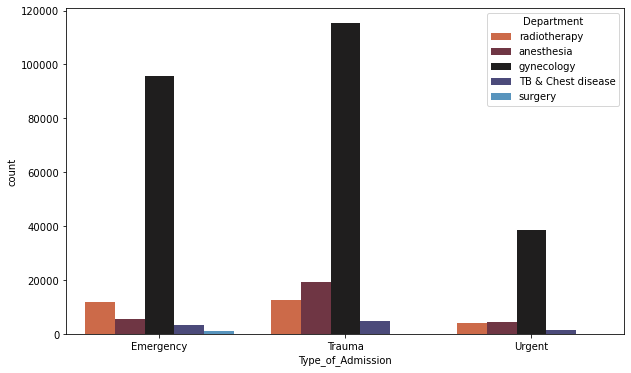

In [48]:
countplot('Type_of_Admission', hue='Department')
# count of admissions type by department

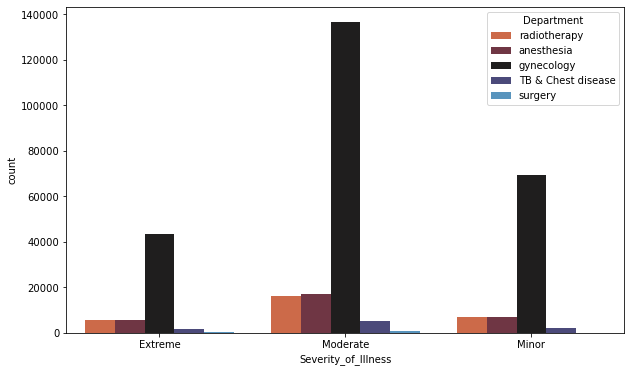

In [52]:
countplot('Severity_of_Illness', hue='Department')

With so many admitted to gynecology for every category it may simply be the department with free beds. 

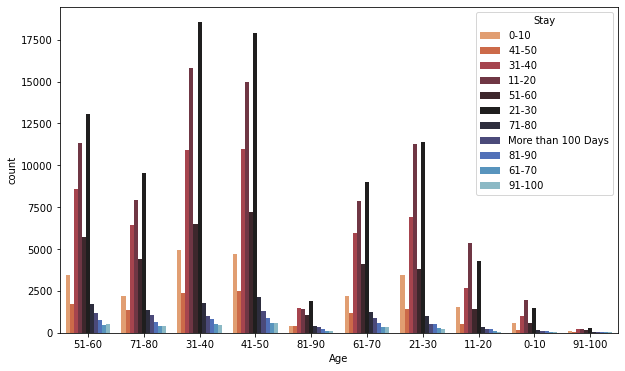

In [49]:
countplot('Age', hue='Stay')

In [ ]:
boxplot('Age', 'Visitors_with_Patient')

In [ ]:
boxplot('Stay', 'Visitors_with_Patient')

In [ ]:
boxplot('Department','Admission_Deposit')

In [ ]:
boxplot('Stay','Admission_Deposit')

### Consider Features to Engineer

There are a number of count features that can be imputed from the data we have. Counts on how many hospitals are in the region or city. Adding features for the counts of available beds and grade of beds by departments, ward type, hospital type, and region could be useful. The Patientid particularly presents some good feature possibilities for whether they live in the region or traveled to go to a particular hospital. Counts of previous visits, how often they have been to the same department, or the number of hospitals they have been to.

Please checkout the notebook '2_features_and_modeling.ipynb' to continue this project